Hands-on Activity 1.1 - Neural Networks


**Names:** SERRANO, Jio A.<br>
**Course and Section:** CPE019 - CPE32S3 <br>
**Date of Submission**: April 2, 2024 <br>
**Instructor:** Engr. Roman Richard<br>


# Activity 1.1 : Neural Networks

#### Objective(s):

This activity aims to demonstrate the concepts of neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to use activation function in neural networks
* Demonstrate how to apply feedforward and backpropagation in neural networks


#### Resources:
* Jupyter Notebook


#### Procedure:

Import the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Define and plot an activation function

### Sigmoid function:

$$
\sigma = \frac{1}{1 + e^{-x}}
$$

$\sigma$ ranges from (0, 1). When the input $x$ is negative, $\sigma$ is close to 0. When $x$ is positive, $\sigma$ is close to 1. At $x=0$, $\sigma=0.5$

In [ ]:
## create a sigmoid function
def sigmoid(x):
    """Sigmoid function"""
    return 1.0 / (1.0 + np.exp(-x))

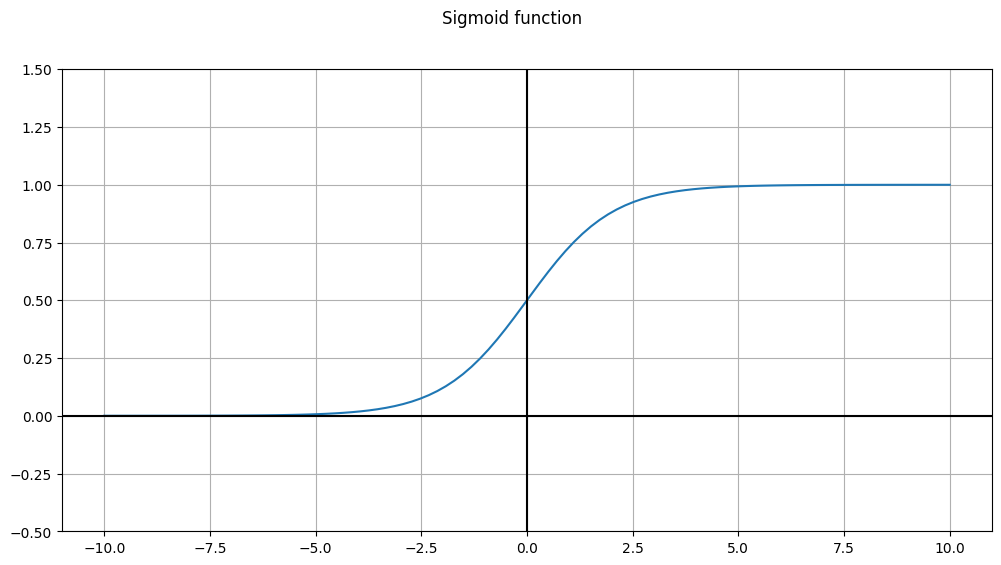

In [ ]:
# Plot the sigmoid function
vals = np.linspace(-10, 10, num=100, dtype=np.float32)
activation = sigmoid(vals)
fig = plt.figure(figsize=(12,6))
fig.suptitle('Sigmoid function')
plt.plot(vals, activation)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks()
plt.ylim([-0.5, 1.5]);

**Remarks**: According to [1], a ***sigmoid*** function is used as an activation funcion in a neural network. Activation function is a function that takes in a weighted sum of inputs and its output is used as an input to the next layer. The sigmoid function, no matter how big or small the inputs are, will always return a value that is in the range [0, 1].



[1] M. Saeed, “A Gentle Introduction To Sigmoid Function - MachineLearningMastery.com,” MachineLearningMastery.com, Aug. 24, 2021. https://machinelearningmastery.com/a-gentle-introduction-to-sigmoid-function/ (accessed Mar. 29, 2024).
‌

Choose any activation function and create a method to define that function.

In [ ]:
def relu(x):

  """ Relu Activation Function
      Outputs the input value directly if it is positive, otherwise, 0."""

  return (np.maximum(0, x))

**Remarks**: The ReLU activation function or the rectified linear unit function is a non-linear or a piecewise function that outputs the input directly if it is positive and 0 if otherwise [2]. This function is commonly used as the activation function for Convolutional Neural Networks and Multilayer Perceptrons [2].

**ReLU Function** is expressed mathematically as:

$$
f(x) = max(0, x)
$$

[2] Vivek Praharsha, “ReLU (Rectified Linear Unit) Activation Function,” OpenGenus IQ: Computing Expertise & Legacy, Dec. 30, 2021. https://iq.opengenus.org/relu-activation/ (accessed Mar. 29, 2024).
‌

Plot the activation function

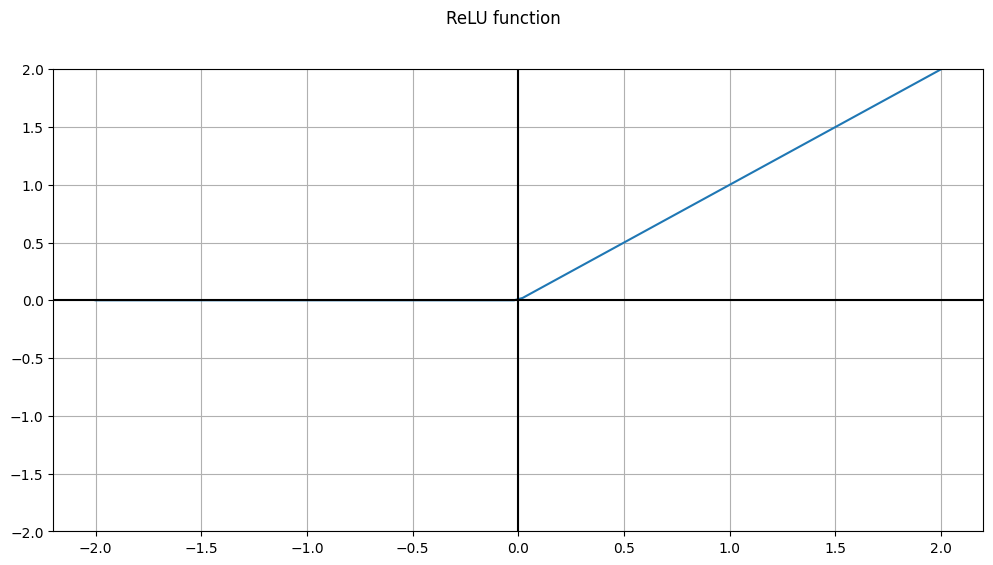

In [ ]:
# Plotting ReLU Function

vals = np.linspace(-2, 2, num=100, dtype=np.float32)
activation = relu(vals)
fig = plt.figure(figsize=(12,6))
fig.suptitle('ReLU function')
plt.plot(vals, activation)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks()
plt.ylim([-2, 2]);

**Remarks**: From the above graph, the x-axis contains the values in `vals` and the y-axis contains the mapped values from the `relu()` function. Based on the graph, the ReLU function's behavior is likely linear, a characteristic that is favored in the optimization process of a neural network as this prevents the issue of *vanishing gradients* [3].

[3] J. Brownlee, “A Gentle Introduction to the Rectified Linear Unit (ReLU) - MachineLearningMastery.com,” MachineLearningMastery.com, Jan. 08, 2019. https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/ (accessed Mar. 29, 2024).
‌

### Neurons as boolean logic gates



### OR Gate

<table>

<tr>
<th colspan="3">OR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>

A neuron that uses the sigmoid activation function outputs a value between (0, 1). This naturally leads us to think about boolean values.



By limiting the inputs of $x_1$ and $x_2$ to be in $\left\{0, 1\right\}$, we can simulate the effect of logic gates with our neuron. The goal is to find the weights , such that it returns an output close to 0 or 1 depending on the inputs.

What numbers for the weights would we need to fill in for this gate to output OR logic? Observe from the plot above that $\sigma(z)$ is close to 0 when $z$ is largely negative (around -10 or less), and is close to 1 when $z$ is largely positive (around +10 or greater).

$$
z = w_1 x_1 + w_2 x_2 + b
$$

Let's think this through:

* When $x_1$ and $x_2$ are both 0, the only value affecting $z$ is $b$. Because we want the result for (0, 0) to be close to zero, $b$ should be negative (at least -10)
* If either $x_1$ or $x_2$ is 1, we want the output to be close to 1. That means the weights associated with $x_1$ and $x_2$ should be enough to offset $b$ to the point of causing $z$ to be at least 10.
* Let's give $b$ a value of -10. How big do we need $w_1$ and $w_2$ to be?
    * At least +20
* So let's try out $w_1=20$, $w_2=20$, and $b=-10$!

In [ ]:
def logic_gate(w1, w2, b):
    # Helper to create logic gate functions
    # Plug in values for weight_a, weight_b, and bias
    return lambda x1, x2: sigmoid(w1 * x1 + w2 * x2 + b)

def test(gate):
    # Helper function to test out our weight functions.
    for a, b in (0, 0), (0, 1), (1, 0), (1, 1):
        print("{}, {}: {}".format(a, b, np.round(gate(a, b))))

In [ ]:
or_gate = logic_gate(20, 20, -10)
test(or_gate)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 1.0


<table>

<tr>
<th colspan="3">OR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>

Try finding the appropriate weight values for each truth table.

### AND Gate

<table>

<tr>
<th colspan="3">AND gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>


Try to figure out what values for the neurons would make this function as an AND gate.

In [ ]:
# Fill in the w1, w2, and b parameters such that the truth table matches
w1 = 20
w2 = 20
b = -30
and_gate = logic_gate(w1, w2, b)

test(and_gate)

0, 0: 0.0
0, 1: 0.0
1, 0: 0.0
1, 1: 1.0


**Remarks**: We used the values 10, 10, and -10 for `w1`, `w2`, and `b`, respectively. The AND gate behaves such that if either of the entries is 0, the output will be 0. That is, if we set the weights to have the same values and the offset to have the same magnitude but different sign as the weights, we can simulate the AND gate behavior. We can confirm this as seen in the above result.

Do the same for the NOR gate and the NAND gate.

### NOR Gate

<table>

<tr>
<th colspan="3">NOR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>0</td>
</tr>

</table>

In [ ]:
w1 = -30
w2 = -30
b = 20
nor_gate = logic_gate(w1, w2, b)

test(nor_gate)

0, 0: 1.0
0, 1: 0.0
1, 0: 0.0
1, 1: 0.0


**Remarks**: For the NOR gate, the output is only 1 if both the inputs are 0. In that case, to simulate the NOR gate, the inputs should be negative, their individual magnitude values should be greater than the magnitude value of the offset. This is such that when we add them, the resulting value should be $>=10$ or $<=-10$.

### NAND Gate

<table>

<tr>
<th colspan="3">NAND gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>0</td>
</tr>

</table>

In [ ]:
w1 = -20
w2 = -20
b = 30
nand_gate = logic_gate(w1, w2, b)

test(nand_gate)

0, 0: 1.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0


**Remarks**: For the NAND gate, the output is 0 only if both the input values are 1, otherwise, the output should be 1. To simulate this, the offset's magnitude value should be greater than the individual magnitude values of the input and less than to the sum of the inputs' magnitude values.

## Limitation of single neuron

 Here's the truth table for XOR:

### XOR (Exclusive Or) Gate

<table>

<tr>
<th colspan="3">XOR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>0</td>
</tr>

</table>

Now the question is, can you create a set of weights such that a single neuron can output this property?

It turns out that you cannot. Single neurons can't correlate inputs, so it's just confused. So individual neurons are out. Can we still use neurons to somehow form an XOR gate?


In [ ]:
# Make sure you have or_gate, nand_gate, and and_gate working from above!
def xor_gate(a, b):
    c = or_gate(a, b)
    d = nand_gate(a, b)
    return and_gate(c, d)

test(xor_gate)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0


**Remarks**: In the above code, we have combined multiple logic gates to simulate an XOR gate. The XOR gate behavior is that when the inputs are the same, the result is 0, otherwise, if the inputs differ, the output is 1.

In the above code, the OR, NAND, and AND gates were used. If both inputs are 0 or 1, there will always be a 0 in `c` or `d`, and ANDing these two will result to 0. This satisfies the behavior of the XOR gate for similar inputs.

On the other hand, if the inputs differ, that is, either one of them is 0 or 1, the values of `c` and `d` will always be 1. ANDing these two will then result to 1 which satisfies the behavior of the XOR gate for different-valued inputs.

## Feedforward Networks

The feed-forward computation of a neural network can be thought of as matrix calculations and activation functions.  We will do some actual computations with matrices to see this in action.

## Exercise
Provided below are the following:

- Three weight matrices `W_1`, `W_2` and `W_3` representing the weights in each layer.  The convention for these matrices is that each $W_{i,j}$ gives the weight from neuron $i$ in the previous (left) layer to neuron $j$ in the next (right) layer.  
- A vector `x_in` representing a single input and a matrix `x_mat_in` representing 7 different inputs.
- Two functions: `soft_max_vec` and `soft_max_mat` which apply the soft_max function to a single vector, and row-wise to a matrix.

The goals for this exercise are:
1. For input `x_in` calculate the inputs and outputs to each layer (assuming sigmoid activations for the middle two layers and soft_max output for the final layer.
2. Write a function that does the entire neural network calculation for a single input
3. Write a function that does the entire neural network calculation for a matrix of inputs, where each row is a single input.
4. Test your functions on `x_in` and `x_mat_in`.

This illustrates what happens in a NN during one single forward pass. Roughly speaking, after this forward pass, it remains to compare the output of the network to the known truth values, compute the gradient of the loss function and adjust the weight matrices `W_1`, `W_2` and `W_3` accordingly, and iterate. Hopefully this process will result in better weight matrices and our loss will be smaller afterwards

In [ ]:
W_1 = np.array([[2,-1,1,4],[-1,2,-3,1],[3,-2,-1,5]])
W_2 = np.array([[3,1,-2,1],[-2,4,1,-4],[-1,-3,2,-5],[3,1,1,1]])
W_3 = np.array([[-1,3,-2],[1,-1,-3],[3,-2,2],[1,2,1]])
x_in = np.array([.5,.8,.2])
x_mat_in = np.array([[.5,.8,.2],[.1,.9,.6],[.2,.2,.3],[.6,.1,.9],[.5,.5,.4],[.9,.1,.9],[.1,.8,.7]])

def soft_max_vec(vec):
    return np.exp(vec)/(np.sum(np.exp(vec)))

def soft_max_mat(mat):
    return np.exp(mat)/(np.sum(np.exp(mat),axis=1).reshape(-1,1))

print('the matrix W_1\n')
print(W_1)
print('-'*30)
print('vector input x_in\n')
print(x_in)
print('-'*30)
print('matrix input x_mat_in -- starts with the vector `x_in`\n')
print(x_mat_in)

the matrix W_1

[[ 2 -1  1  4]
 [-1  2 -3  1]
 [ 3 -2 -1  5]]
------------------------------
vector input x_in

[0.5 0.8 0.2]
------------------------------
matrix input x_mat_in -- starts with the vector `x_in`

[[0.5 0.8 0.2]
 [0.1 0.9 0.6]
 [0.2 0.2 0.3]
 [0.6 0.1 0.9]
 [0.5 0.5 0.4]
 [0.9 0.1 0.9]
 [0.1 0.8 0.7]]


## Exercise
1. Get the product of array x_in and W_1 (z2)
2. Apply sigmoid function to z2 that results to a2
3. Get the product of a2 and z2 (z3)
4. Apply sigmoid function to z3 that results to a3
5. Get the product of a3 and z3 that results to z4


In [ ]:
z2 = np.dot(x_in, W_1) # 1. Getting the product of array x_in and matrix W_1
print(f"z2: {z2}")
a2 = sigmoid(z2) # 2. Apply sigmoid function to z2 that results to a2
print(f"a2: {a2}")
z3 = np.dot(a2, z2) # 3. Get the product of a2 and z2 (z3)
print(f"z3: {z3}")
a3 = sigmoid(z3) # 4. Apply sigmoid function to z3 that results to a3
print(f"a3: {a3}")
z4 = np.dot(a3, z3) # 5. Get the product of a3 and z3 that results to z4
print(f"z4: {z4}")

z2: [ 0.8  0.7 -2.1  3.8]
a2: [0.68997448 0.66818777 0.10909682 0.97811873]
z3: 4.507458871351723
a3: 0.9890938122523221
z4: 4.458299678635824


**Remarks**: To perform the multiplication of matrices, the `np.dot` function was used. The sigmoid function will then plug in the values of the matrix in the equation defined in it.

In [ ]:
def soft_max_vec(vec):
    return np.exp(vec)/(np.sum(np.exp(vec)))

def soft_max_mat(mat):
    return np.exp(mat)/(np.sum(np.exp(mat),axis=1).reshape(-1,1))


7. Apply soft_max_vec function to z4 that results to y_out

In [ ]:
y_out = soft_max_vec(z4) # 7. Apply soft_max_vec function to z4 that results to y_out
print(y_out)

1.0


In [ ]:
## A one-line function to do the entire neural net computation

def nn_comp_vec(x):
    return soft_max_vec(sigmoid(sigmoid(np.dot(x,W_1)).dot(W_2)).dot(W_3))

def nn_comp_mat(x):
    return soft_max_mat(sigmoid(sigmoid(np.dot(x,W_1)).dot(W_2)).dot(W_3))

In [ ]:
nn_comp_vec(x_in)

array([0.72780576, 0.26927918, 0.00291506])

In [ ]:
nn_comp_mat(x_mat_in)

array([[0.72780576, 0.26927918, 0.00291506],
       [0.62054212, 0.37682531, 0.00263257],
       [0.69267581, 0.30361576, 0.00370844],
       [0.36618794, 0.63016955, 0.00364252],
       [0.57199769, 0.4251982 , 0.00280411],
       [0.38373781, 0.61163804, 0.00462415],
       [0.52510443, 0.4725011 , 0.00239447]])

**Remarks**: The one-liner code results differ from the value obtained from the step-by-step process. It should be noted that in the one-liner code, the sigmoid results are multiplied to the weights, unlike in the step-by-step which causes the shape of the matrix to change.

To recreate the one-liner code in step-by-step process, we do the following corrections:

In [ ]:
z2 = np.dot(x_in, W_1) # 1. Getting the product of array x_in and matrix W_1
print(f"z2: {z2}")
a2 = sigmoid(z2) # 2. Apply sigmoid function to z2 that results to a2
print(f"a2: {a2}")
z3 = np.dot(a2, W_2) # 3. Changed z2 to W_2
print(f"z3: {z3}")
a3 = sigmoid(z3) # 4. Apply sigmoid function to z3 that results to a3
print(f"a3: {a3}")
z4 = np.dot(a3, W_3) # 5. Changed z_3 to W_3
print(f"z4: {z4}")

y_out = soft_max_vec(z4) # 7. Apply soft_max_vec function to z4 that results to y_out
print(f"y_out: {y_out}")

z2: [ 0.8  0.7 -2.1  3.8]
a2: [0.68997448 0.66818777 0.10909682 0.97811873]
z3: [ 3.55880727  4.01355384  0.48455118 -1.55014198]
a3: [0.97231549 0.98225163 0.61882199 0.17506576]
z4: [ 2.04146788  1.04718238 -3.47867612]
y_out: [0.72780576 0.26927918 0.00291506]


Now, we have obtained the same results of `y_out` as in the one-liner code.

## Backpropagation
The backpropagation in this part will be used to train a multi-layer perceptron (with a single hidden layer).  Different patterns will be used and the demonstration on how the weights will converge. The different parameters such as learning rate, number of iterations, and number of data points will be demonstrated

In [ ]:
#Preliminaries
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Fill out the code below so that it creates a multi-layer perceptron with a single hidden layer (with 4 nodes) and trains it via back-propagation.  Specifically your code should:

1. Initialize the weights to random values between -1 and 1
1. Perform the feed-forward computation
1. Compute the loss function
1. Calculate the gradients for all the weights via back-propagation
1. Update the weight matrices (using a learning_rate parameter)
1. Execute steps 2-5 for a fixed number of iterations
1. Plot the accuracies and log loss and observe how they change over time


Once your code is running, try it for the different patterns below.

- Which patterns was the neural network able to learn quickly and which took longer?
- What learning rates and numbers of iterations worked well?


shape of x_mat_full is (500, 3)
shape of y is (500,)


<ipython-input-186-a2756dc9e206>:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
<ipython-input-186-a2756dc9e206>:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')


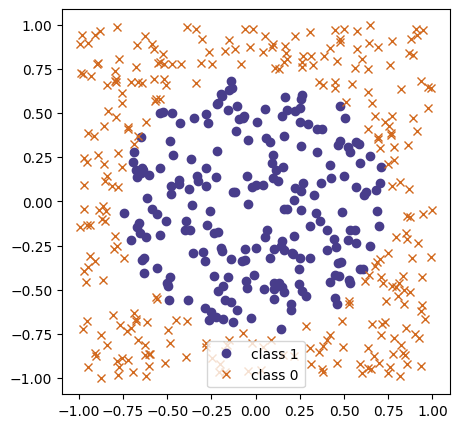

In [ ]:
## This code below generates two x values and a y value according to different patterns
## It also creates a "bias" term (a vector of 1s)
## The goal is then to learn the mapping from x to y using a neural network via back-propagation

num_obs = 500
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)

# PICK ONE PATTERN BELOW and comment out the rest.

# Circle pattern
y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

# # Diamond Pattern
# y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

# # Centered square
# y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

# # Thick Right Angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

# # Thin right angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)


print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

In [ ]:
def sigmoid(x):
    """
    Sigmoid function
    """
    return 1.0 / (1.0 + np.exp(-x))


def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)


def forward_pass(W1, W2):
    """
    Does a forward computation of the neural network
    Takes the input `x_mat` (global variable) and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    global x_mat
    global y
    global num_

    # First, compute the new predictions `y_pred`
    z_2 = np.dot(x_mat, W_1)
    a_2 = sigmoid(z_2)
    z_3 = np.dot(a_2, W_2)
    y_pred = sigmoid(z_3).reshape((len(x_mat),))

    # Now compute the gradient
    J_z_3_grad = -y + y_pred
    # J_W_2_grad = np.dot(J_z_3_grad, a_2)
    J_W_2_grad = np.dot(a_2.T, J_z_3_grad.reshape(-1, 1))
    a_2_z_2_grad = sigmoid(z_2)*(1-sigmoid(z_2))
    # J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
    J_W_1_grad = np.dot(x_mat.T, np.dot(J_z_3_grad.reshape(-1, 1), W2.T) * a_2_z_2_grad)
    gradient = (J_W_1_grad, J_W_2_grad)

    # return
    return y_pred, gradient


def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')

    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

Complete the pseudocode below

Iteration 200: Loss = 0.6145, Accuracy = 0.6420
Iteration 400: Loss = 0.4323, Accuracy = 0.8300
Iteration 600: Loss = 0.2405, Accuracy = 0.9400
Iteration 800: Loss = 0.2022, Accuracy = 0.9360
Iteration 1000: Loss = 0.1829, Accuracy = 0.9460


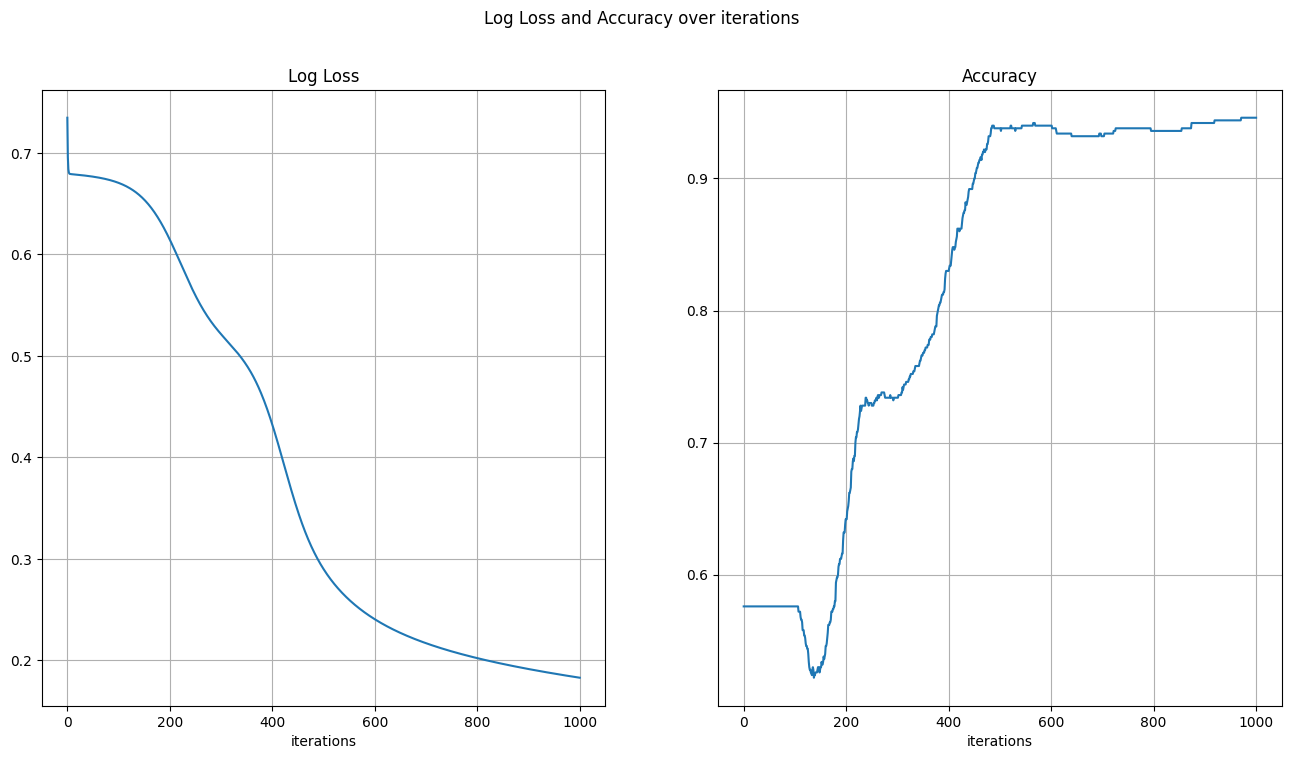

In [ ]:
#### Initialize the network parameters

input_size = x_mat_full.shape[1]
hidden_nodes = 4
output_size = 1

np.random.seed(1241)

# Initialize weight matrices
W_1 = np.random.uniform(-1, 1, size=(input_size, hidden_nodes))
W_2 = np.random.uniform(-1, 1, size=(hidden_nodes, output_size))

num_iter = 1001 # arbitrarily chosen
learning_rate = 0.003 # arbitrarily chosen
x_mat = x_mat_full

loss_vals, accuracies = [], []

for i in range(num_iter):
    ### Do a forward computation, and get the gradient
    y_pred, gradient = forward_pass(W_1, W_2)

    ## Update the weight matrices
    W_1 -= learning_rate * gradient[0]
    W_2 -= learning_rate * gradient[1]

    ### Compute the loss and accuracy
    loss = loss_fn(y, y_pred)
    loss_vals.append(loss)

    accuracy = np.mean((y_pred >= 0.5) == y)
    accuracies.append(accuracy)

    ## Print the loss and accuracy for every 200th iteration
    if (i >= 200 and i % 200 == 0):
      print(f"Iteration {i}: Loss = {loss:.4f}, Accuracy = {accuracy:.4f}")


plot_loss_accuracy(loss_vals, accuracies)

**Remarks**: The weight matrices sizes ar the first thing that should be decided. The matrix sizes are in terms or row and column, in that order. Imagine that we are in the first layer (input layer), the **row size** depends on the number of neurons in the current layer, which, in our case is 3, the two x values, and the bias term. The **column size** depends on the number of neurons in the next layer, which in our case is 4, it was mentioned that the hidden layer has 4 nodes. Hence, our weight matrix 1, `W_1` will be a 3 by 4 matrix composed of random values from -1 to 1.

On the other hand, for `W_2`, we are now in the hidden layer. The row size will be 4 since there are 4 nodes in the hidden layer, and the column size will be 1, which is the output node.

The matrices sizes check out as we will be performing multiplication of matrices. One rule is that the number of columns in the first matrix should be equal to the number of rows in the second matrix [5]. It is noted that in the earlier parts of this activity, we are multiplying the input with the weight matrices, in this exercise the input is 3x1, hence, the weight matrix, `W_1`, of size 3x4 is valid.

For weight updating, I referenced [6], it states that the formula for updating the weight is $ W_n = W_n - Lr * gradient $.

***Graphing Loss and Accuracy***: The loss in the above code is computed by getting the discrepancy between the actual value, `y`, and the predicted value, `y_pred` and by applying the loss function formula. The accuracy on the other hand is computed by setting a threshold of 0.5, a value commonly used in binary classification such as this one [7], comparing the value of the actual and predicted, and then obtaining their mean.

***Graph Interpretation***: Based on the graph, we can see that at a certain point, the value of `accuracy` starts fluctuating high and low. We can also see that the values for `loss` are decreasing significantly.

<br><br>

[4] Little, “weight matrix dimension intuition in a neural network,” Stack Overflow, 2024. https://stackoverflow.com/questions/55348647/weight-matrix-dimension-intuition-in-a-neural-network (accessed Mar. 30, 2024).
‌

[5] “Matrix Multiplication: How to Multiply Two Matrices Together. Step by step visual animation and interactive practice problems,” Mathwarehouse.com, 2024. https://www.mathwarehouse.com/algebra/matrix/multiply-matrix.php (accessed Mar. 30, 2024).
‌

[6] A. Obuchowski, “Understanding neural networks 2: The math of neural networks in 3 equations,” Medium, Apr. 16, 2020. https://becominghuman.ai/understanding-neural-networks-2-the-math-of-neural-networks-in-3-equations-6085fd3f09df?fbclid=IwAR1MBVppZIMyqmTeAgyAJpphXZyqBNWAgmFukRg4Lw1NV553yJtBJwI8RTg (accessed Mar. 30, 2024).
‌

[7] A. Demeusy, “Machine Learning Tips: Adjusting Decision Threshold for binary classification,” Medium, Sep. 24, 2023. https://medium.com/@anthony.demeusy/machine-learning-tips-adjusting-decision-threshold-for-binary-classification-c937d7046a43 (accessed Mar. 30, 2024).
‌


Plot the predicted answers, with mistakes in yellow

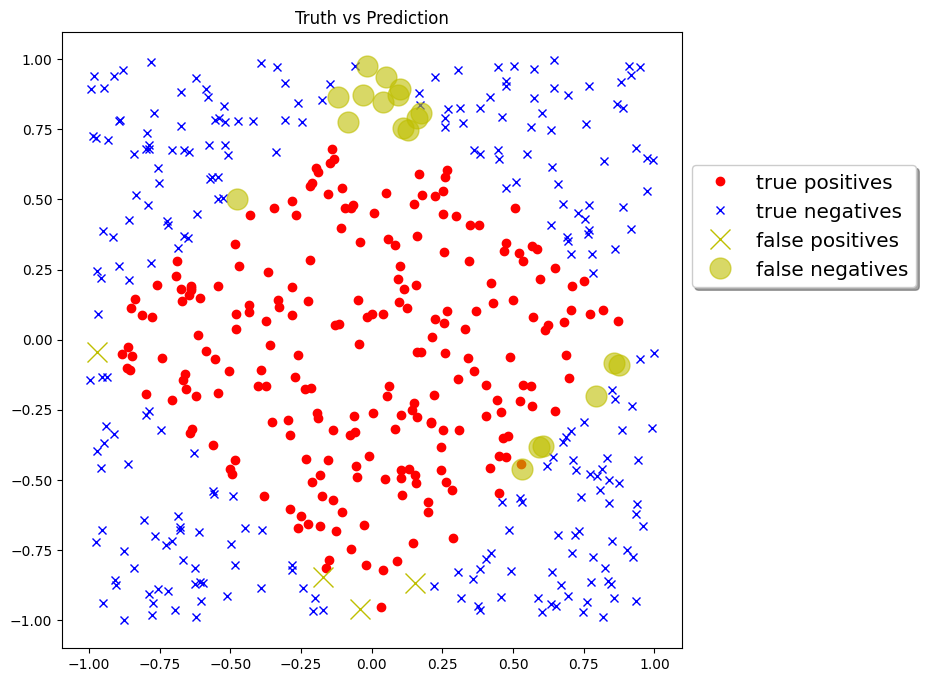

In [ ]:
pred1 = (y_pred>=.5)
pred0 = (y_pred<.5)

fig, ax = plt.subplots(figsize=(8, 8))
# true predictions
ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1], 'ro', label='true positives')
ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1], 'bx', label='true negatives')
# false predictions
ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1], 'yx', label='false positives', markersize=15)
ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1], 'yo', label='false negatives', markersize=15, alpha=.6)
ax.set(title='Truth vs Prediction')
ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='x-large');

**Remarks**: The graph above shows the results from the model. As we can see, the model was able to correctly identify a majority of the results.

#### Other `learning_rate` Values

According to [8], the learning rate is one of the most important parameter that can be tweaked for the neural network training. This refers to how quickly the model "learns" the problem. Optimizing this value affects the performance of the model significantly.

Compiled in this part are the results from the different `learning_rate` values tested for the circle pattern.


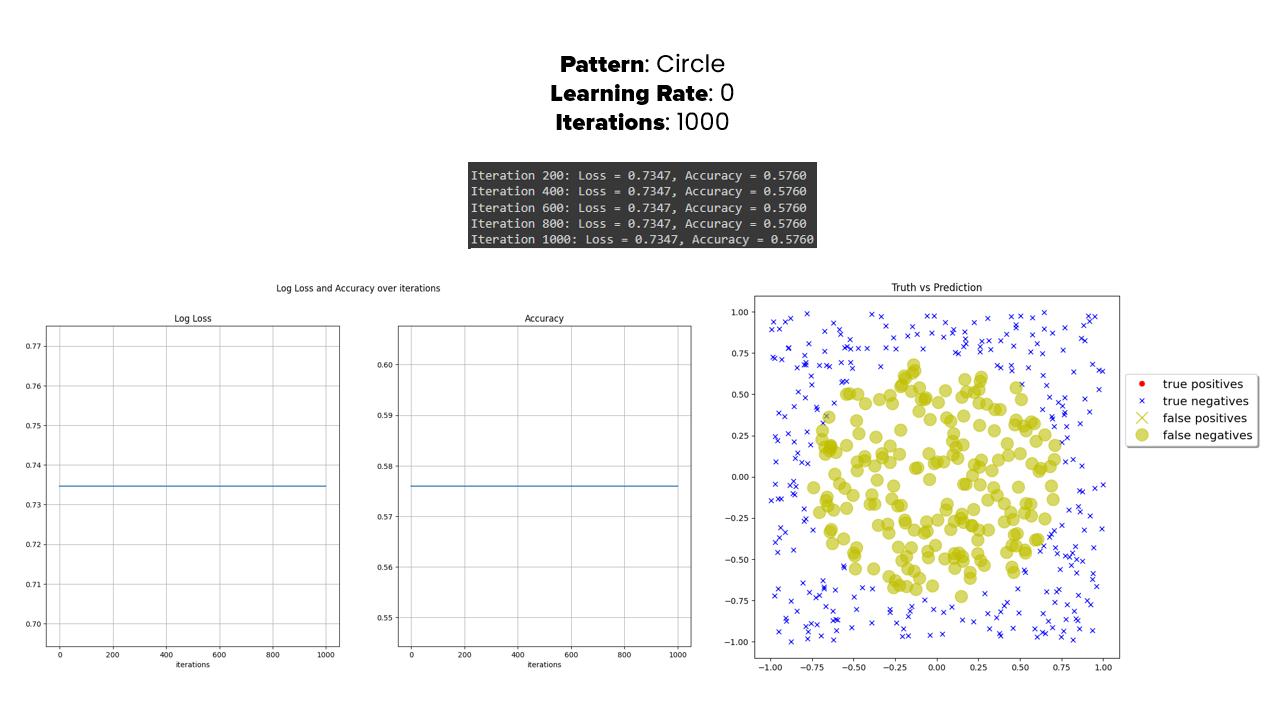

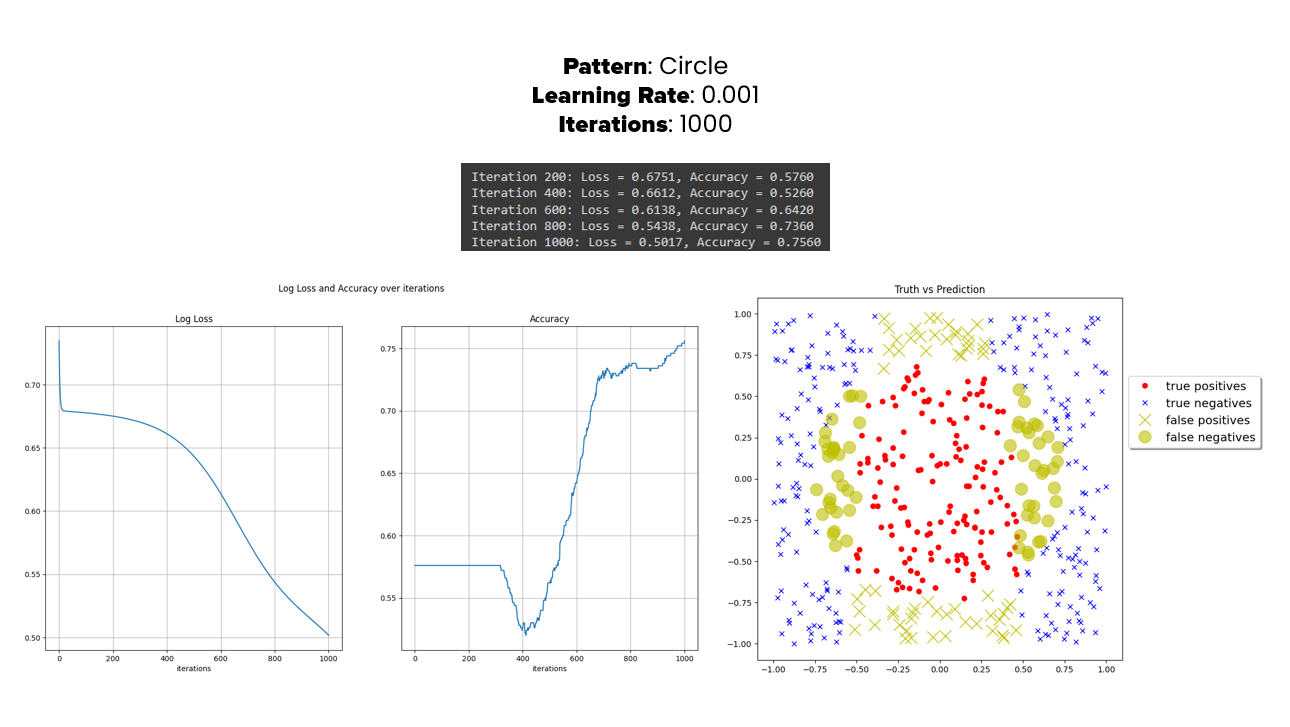

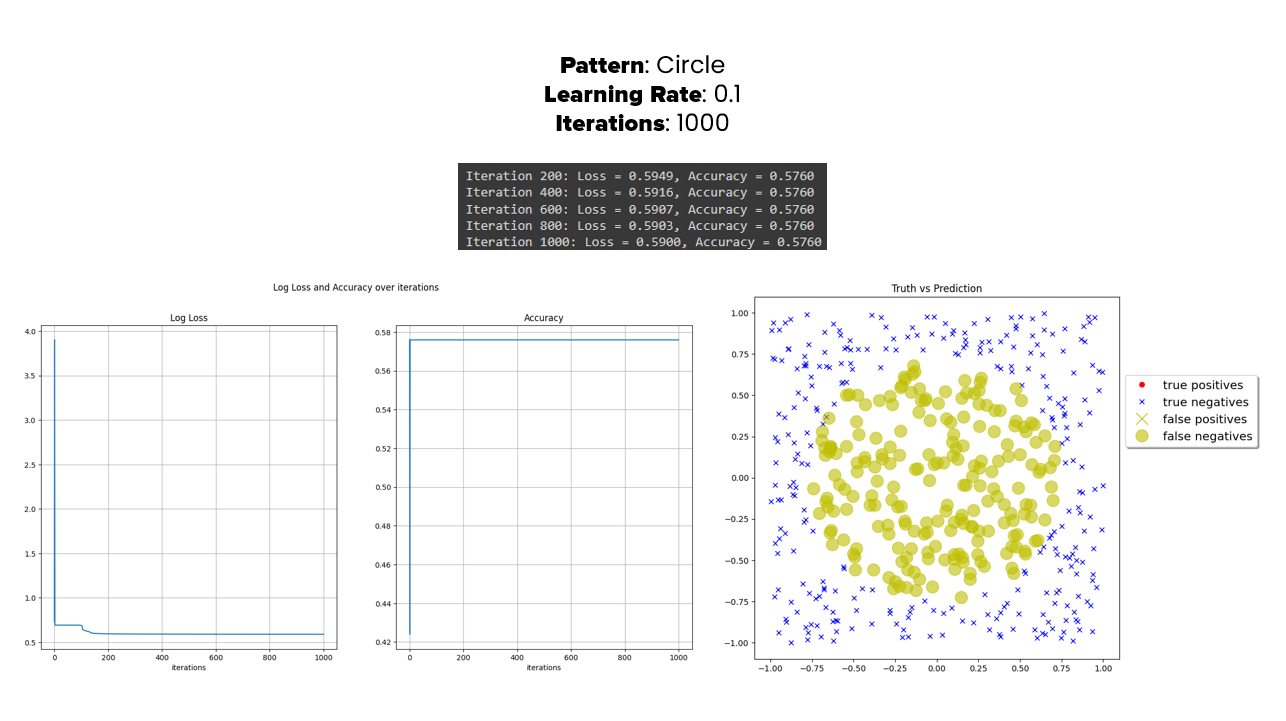

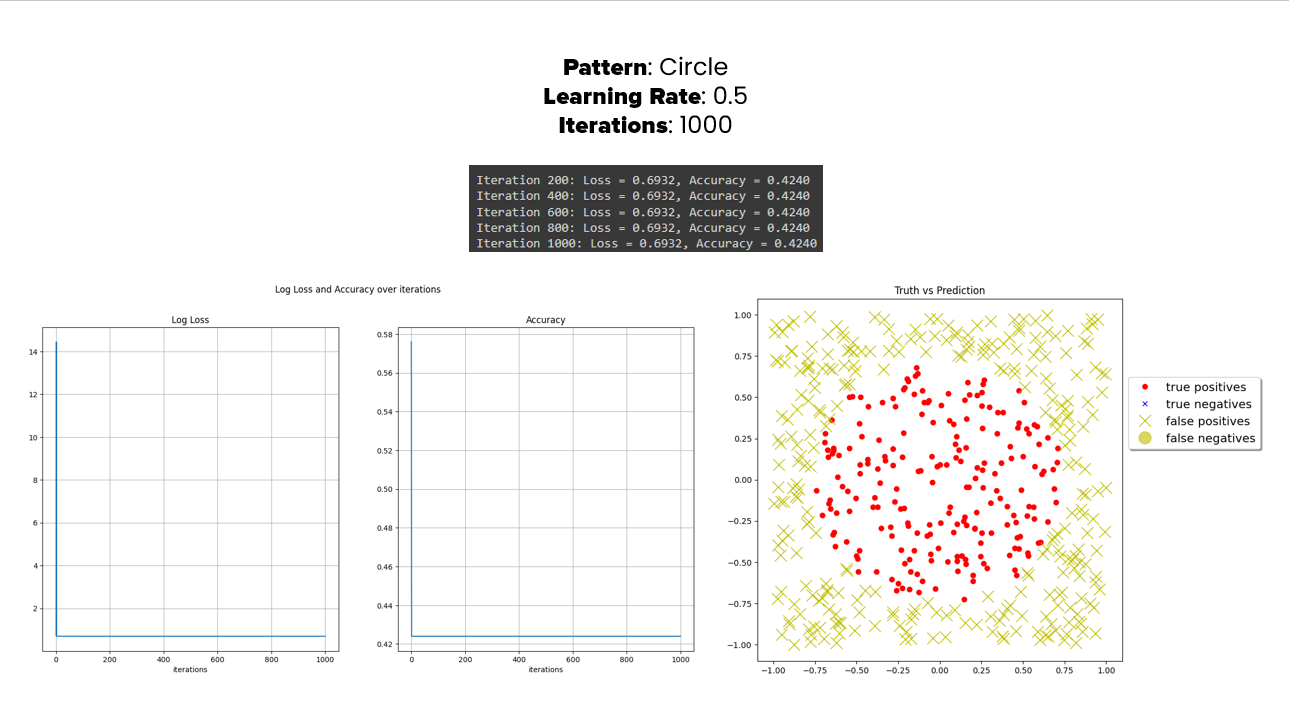

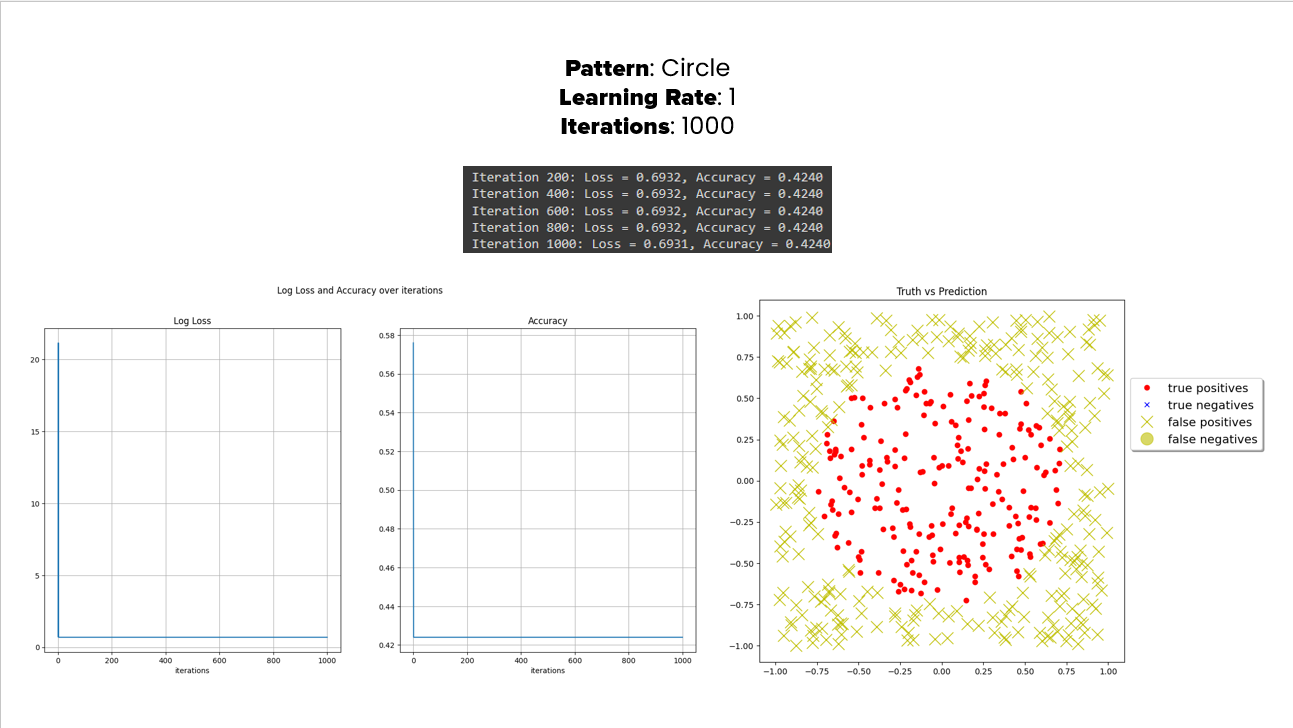

**Remarks**: From the above results, when the learning rate is at 0 and 0.1, the model only outputs negative values for all its inputs. Hence, the graph shows that there are only true negatives and false negatives.

The contrary happens when the learning rate is at 0.5 and 1.

The learning rate of 0.001 produced satisfactory results with approximately 75% accuracy.

### Trying other patterns

In this part, the other patterns will be tested. Compilations of the results will be shown here.

#### Learning Rate: 0, Iterations: 2000

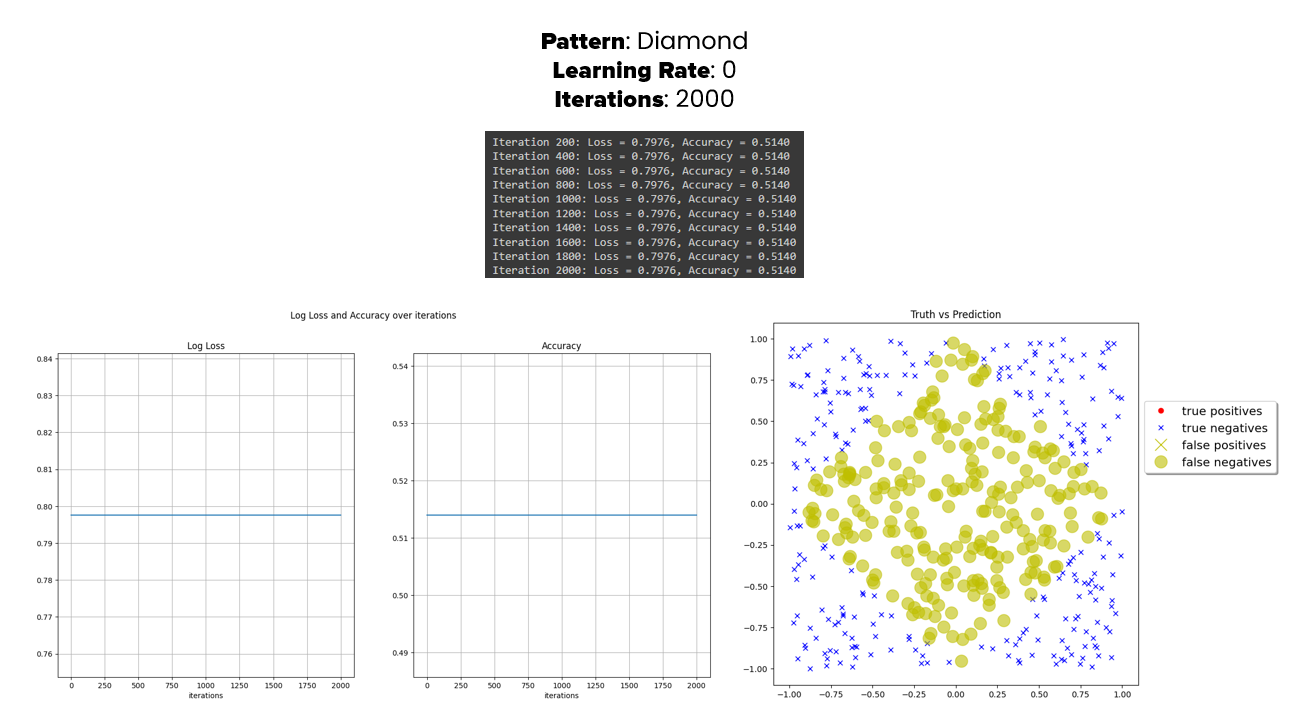

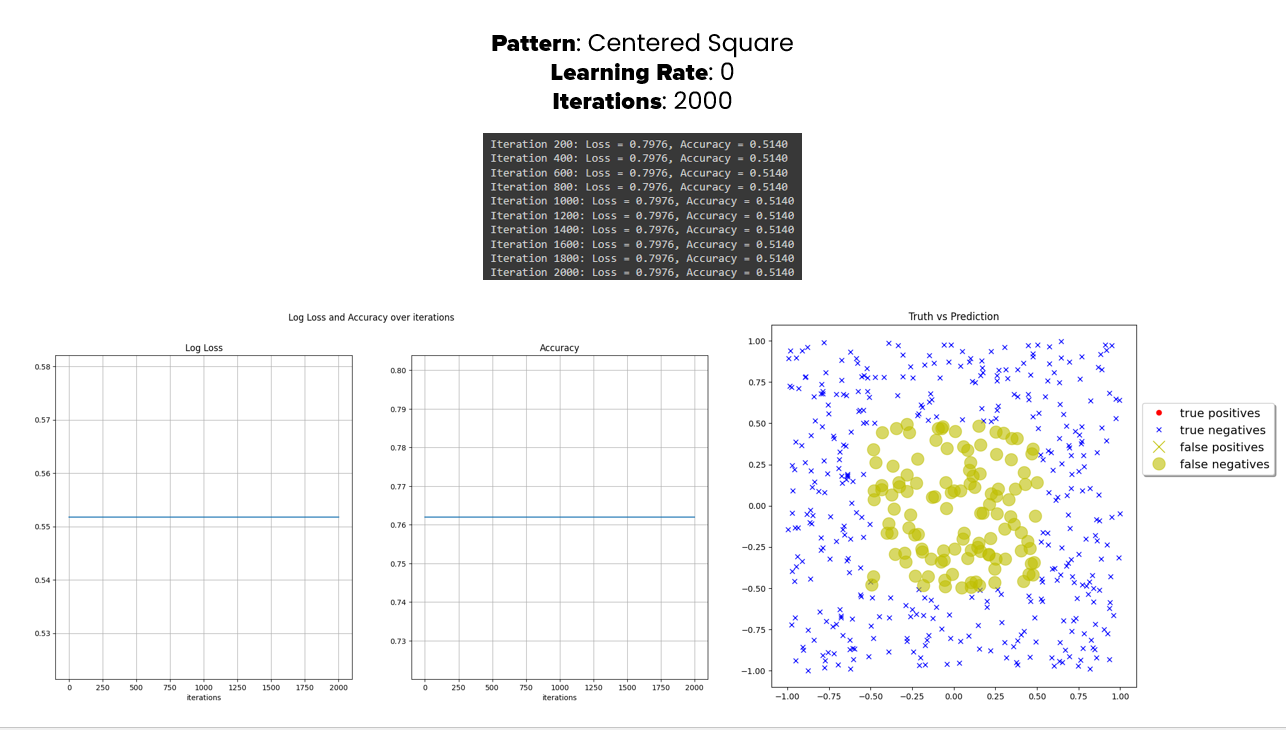

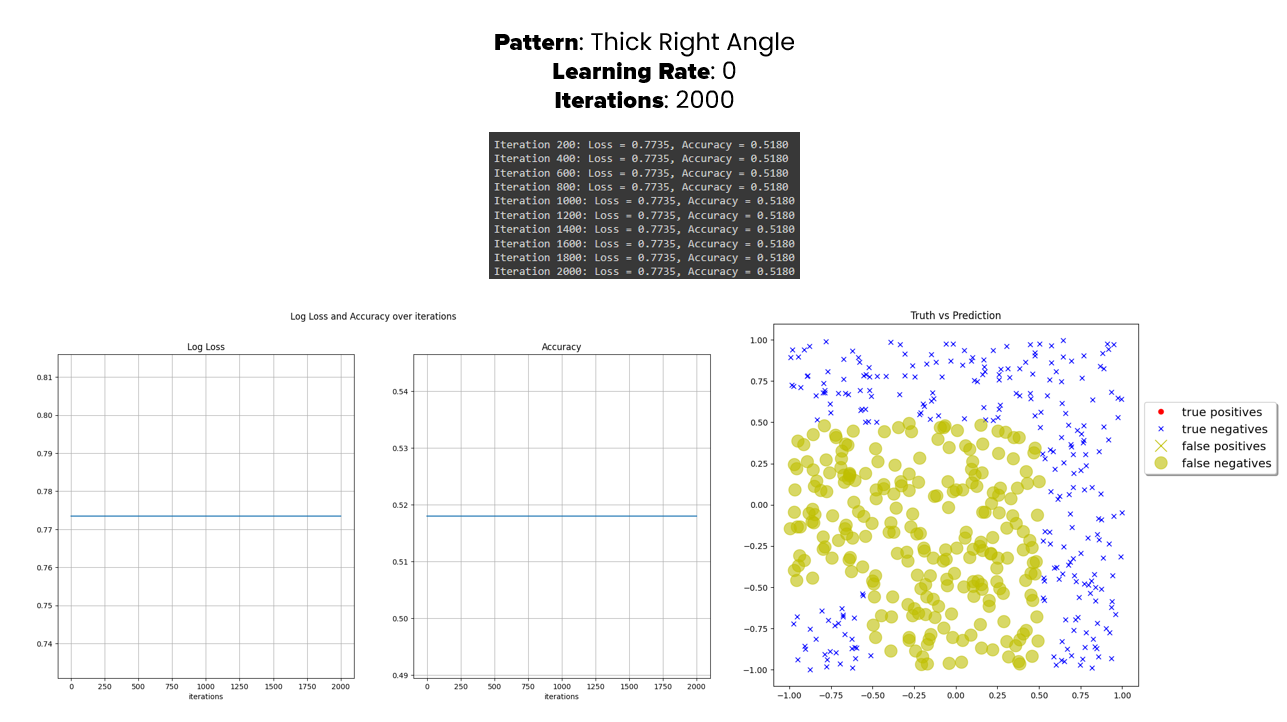

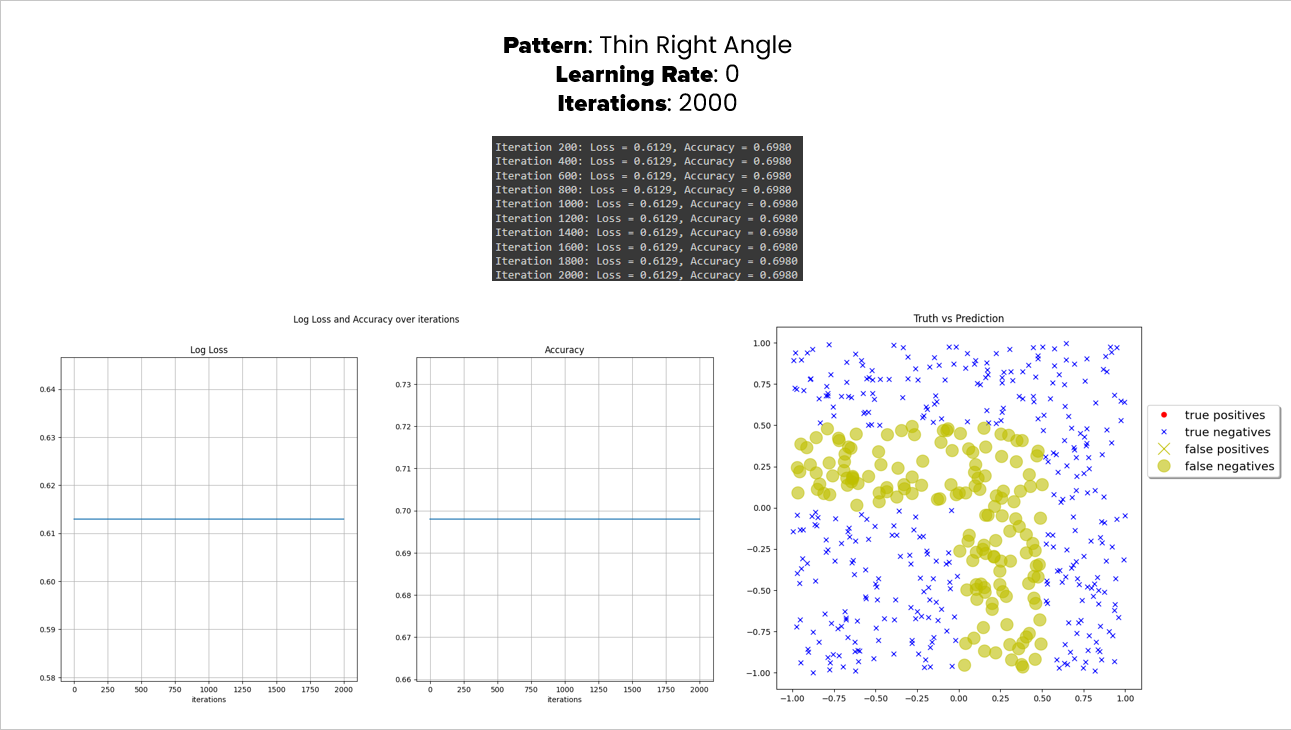

**Remarks**: All the other patterns behaved similarly when the learning rate was set to 0. The model just outputs a negative value for all the inputs.

#### Learning Rate: 0.003, Iterations: 2000

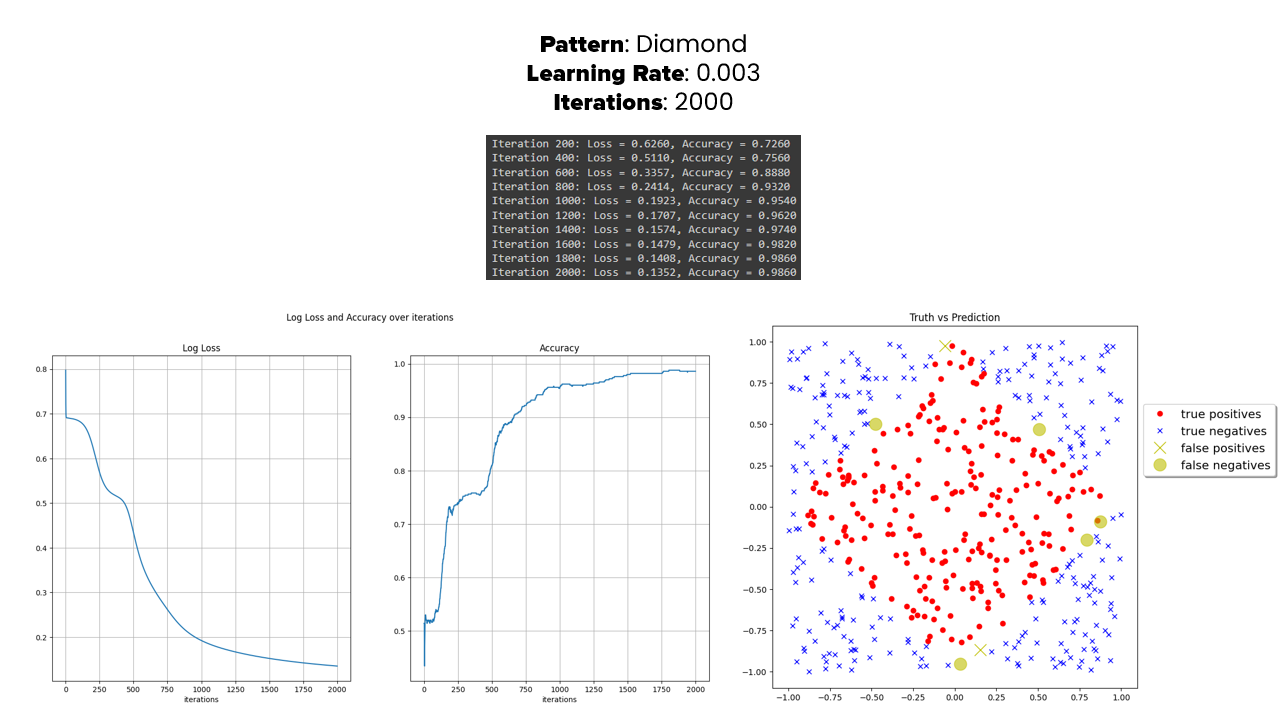

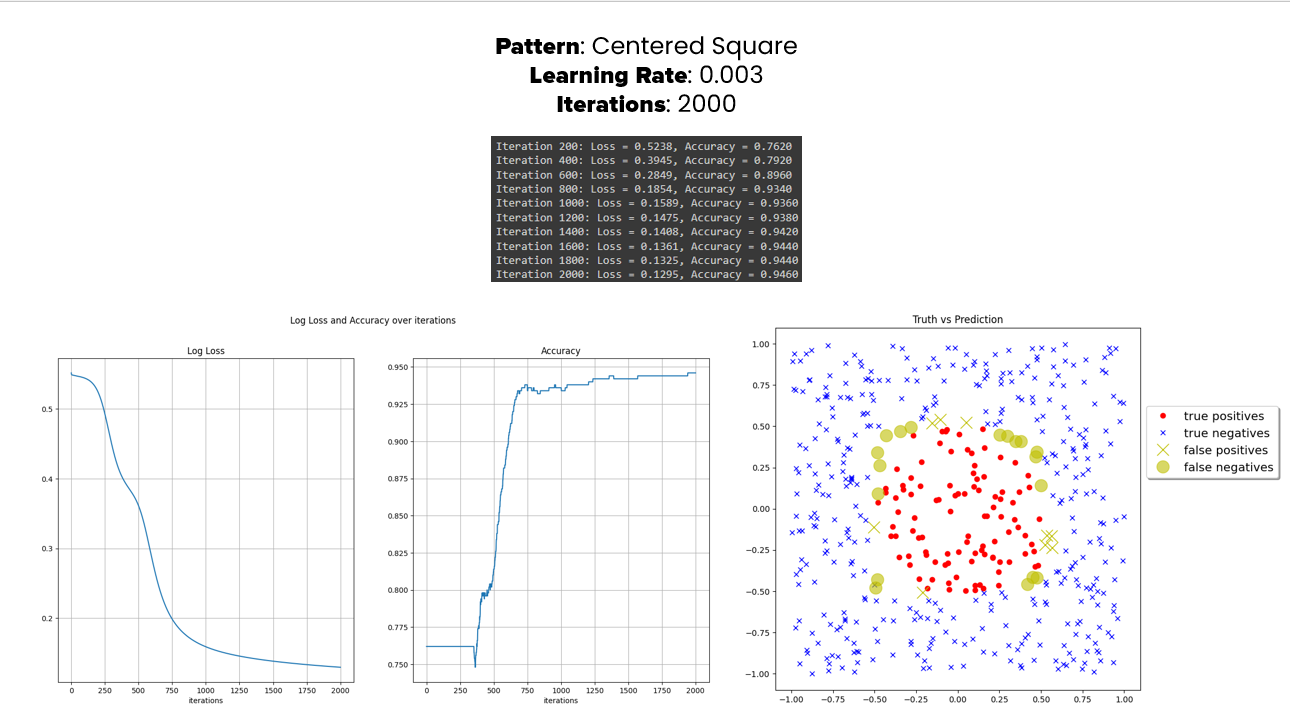

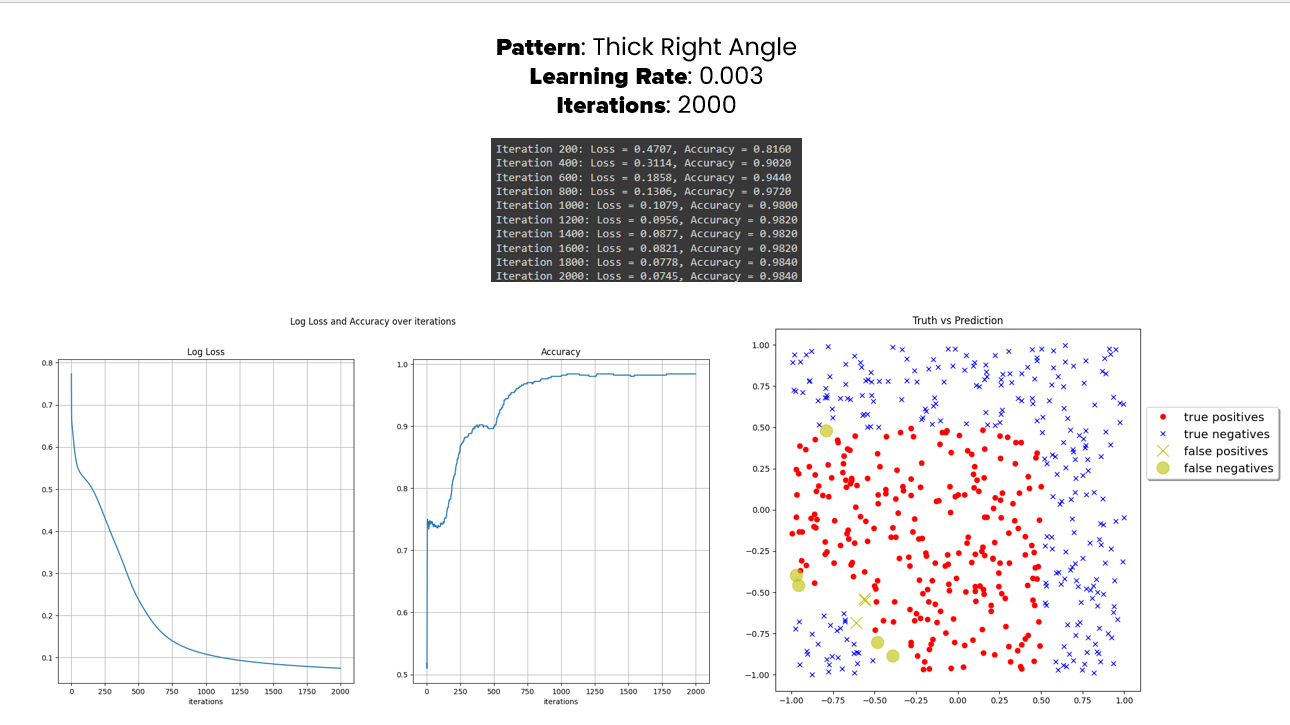

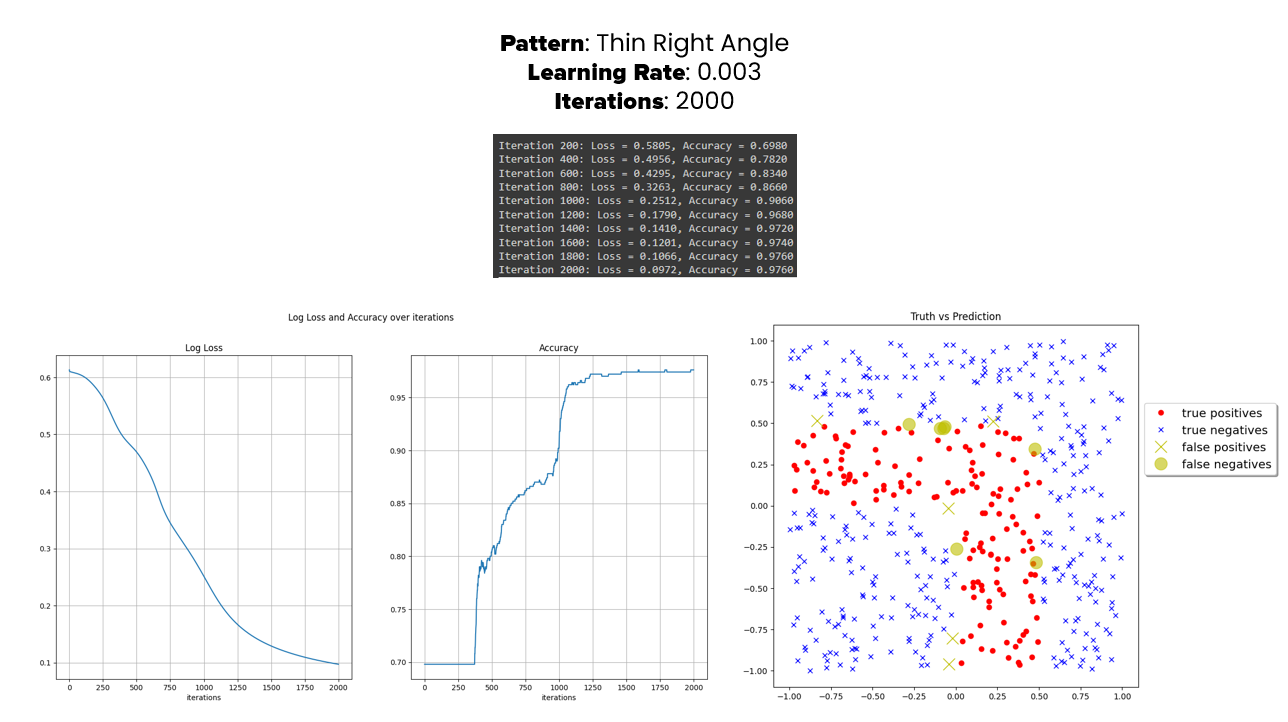

**Remarks**: Similar to the circle pattern, the other models also performed quite well when the learning rate was set to 0.003 with their accuracies reaching up to approximately 98%.

#### Learning Rate: 1, Iterations: 2000

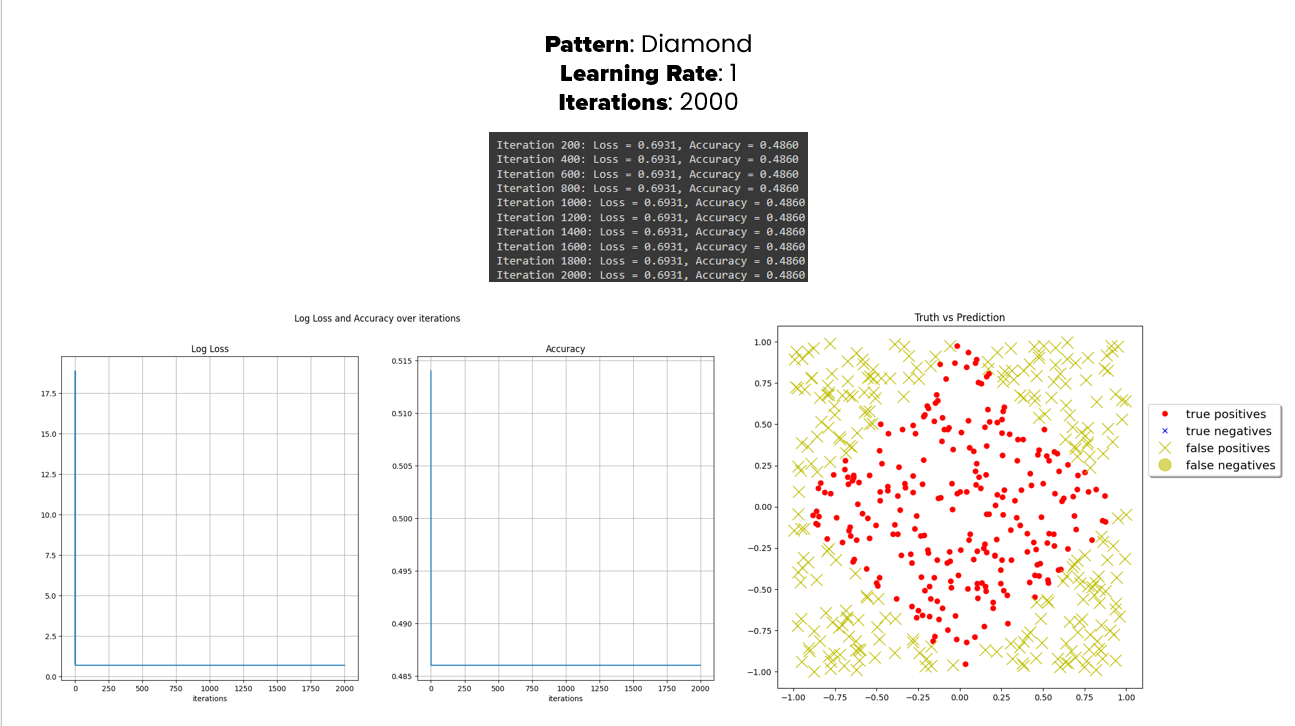

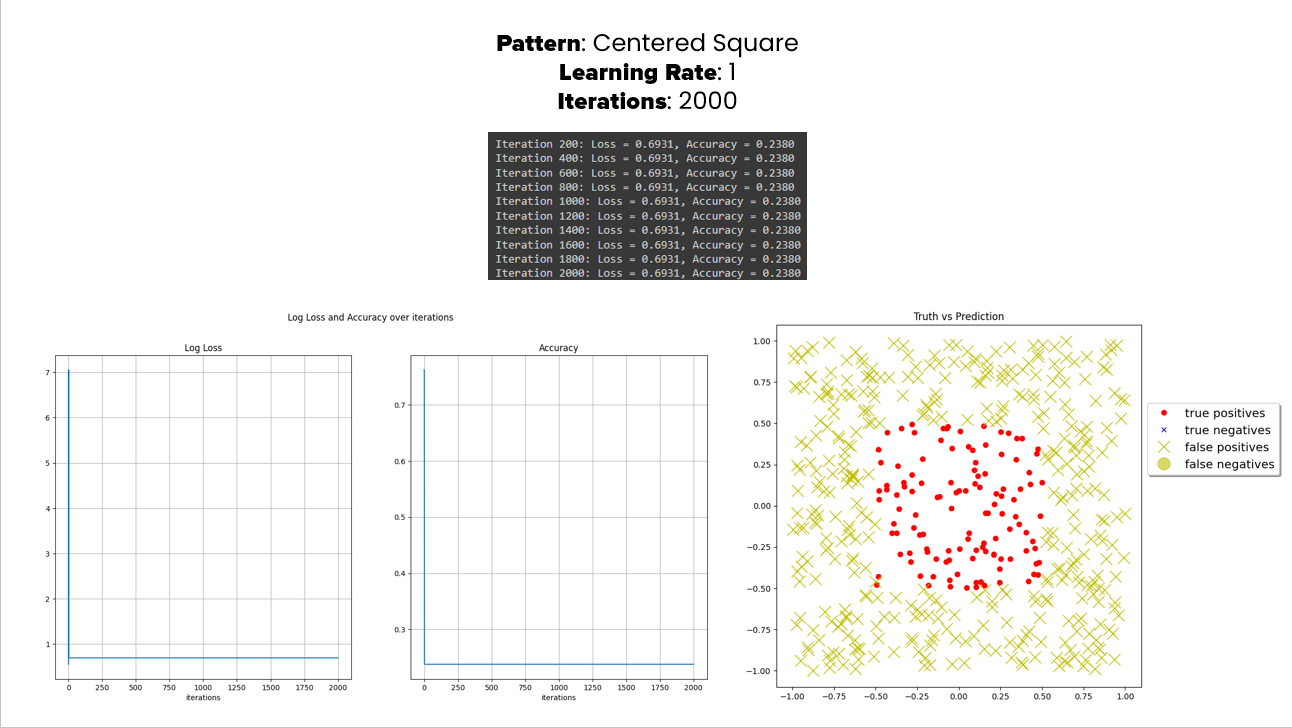

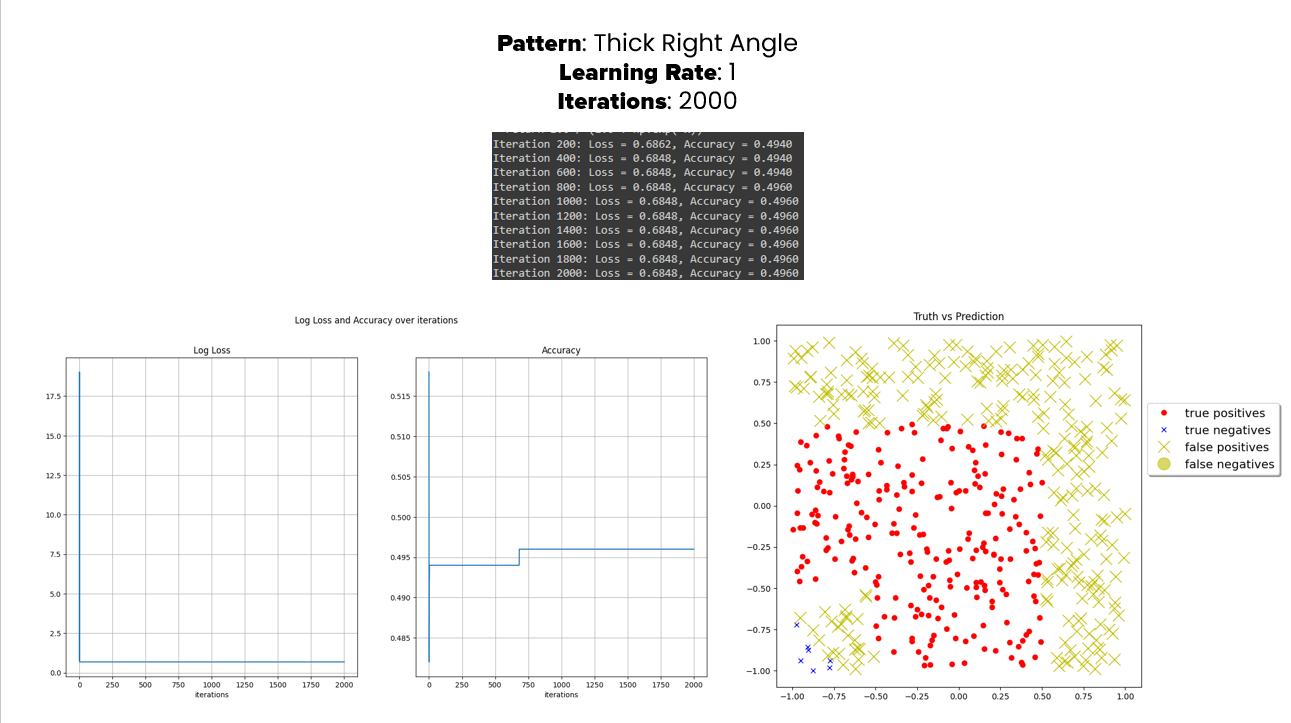

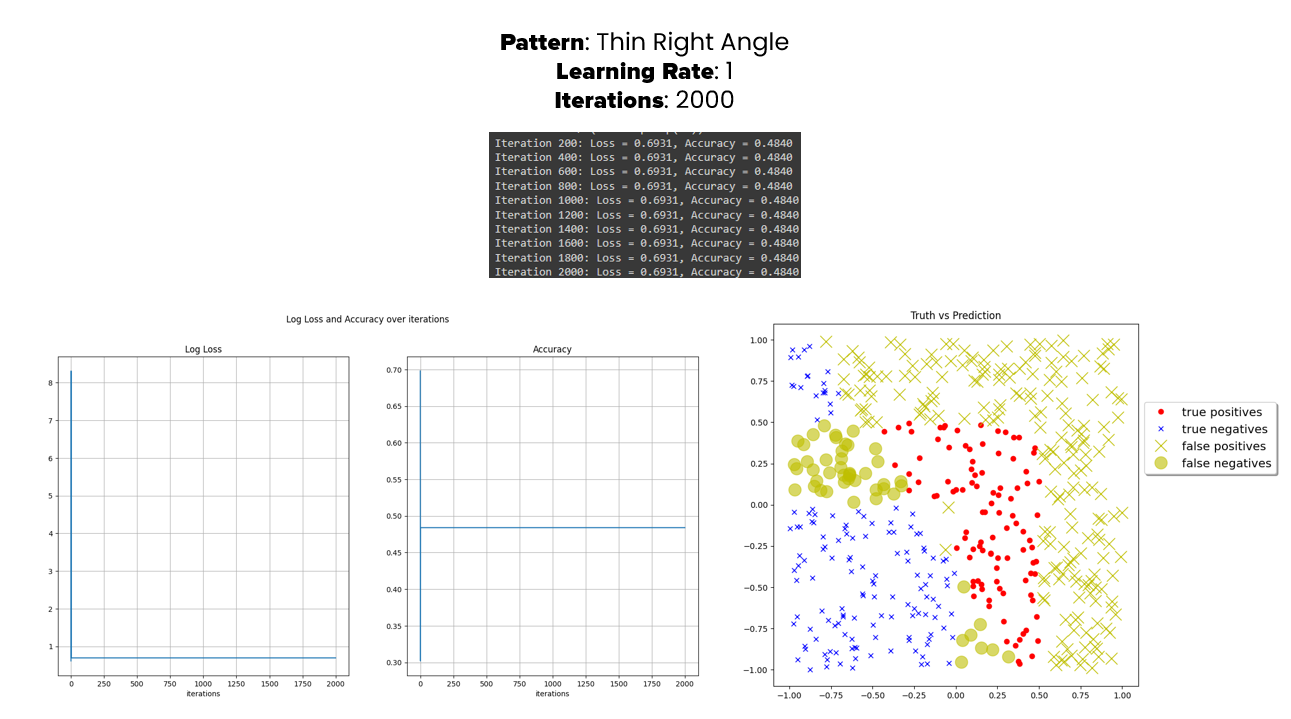

**Remarks**: For regular patterns like circle, diamond, and centered square, when the value of learning rate was set to 1, all of the values were predicted to be positive. One interesting thing is that in the thin and thick right angle patterns, there were also negatives being predicted by the model.

#### Supplementary Activity

1. Use a different weights , input and activation function
2. Apply feedforward and backpropagation
3. Plot the loss and accuracy for every 300th iteration


For the supplementary activity, I will use the ReLU activation function. For the weights, I will change the range from [-1, 1] to [0, 1]. The input will be random values ranging from -2 to 1. The output, or `y` that will be used is one of the patterns earlier, the diamond pattern.

shape of x_mat_full is (500, 3)
shape of y is (500,)


<ipython-input-163-927ef84366ab>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
<ipython-input-163-927ef84366ab>:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')


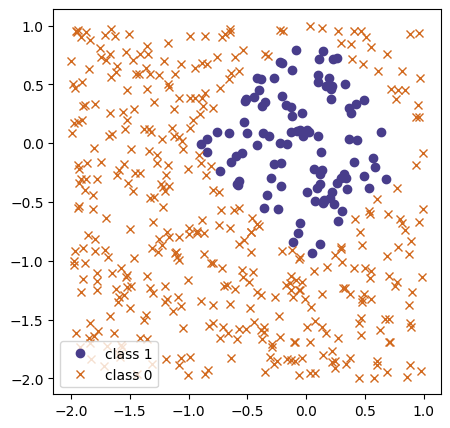

In [ ]:
num_obs = 500
x_mat_1 = np.random.uniform(-2, 1, size = (num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)

# Diamond Pattern
y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

In [ ]:
def relu(x):
    return (np.maximum(0, x))


def loss_fn(y_true, y_pred, eps=1e-16):

    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)


def forward_pass(W1, W2):

    global x_mat
    global y
    global num_

    # First, compute the new predictions `y_pred`
    z_2 = np.dot(x_mat, W_1)
    a_2 = relu(z_2)
    z_3 = np.dot(a_2, W_2)
    y_pred = relu(z_3).reshape((len(x_mat),))

    # Now compute the gradient
    J_z_3_grad = -y + y_pred
    # J_W_2_grad = np.dot(J_z_3_grad, a_2)
    J_W_2_grad = np.dot(a_2.T, J_z_3_grad.reshape(-1, 1))
    a_2_z_2_grad = np.where(z_2 > 0, 1, 0)
    # J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
    J_W_1_grad = np.dot(x_mat.T, np.dot(J_z_3_grad.reshape(-1, 1), W2.T) * a_2_z_2_grad)
    gradient = (J_W_1_grad, J_W_2_grad)

    # return
    return y_pred, gradient


def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')

    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

Iteration 200: Loss = 0.1203, Accuracy = 0.9320
Iteration 400: Loss = 0.1276, Accuracy = 0.9240
Iteration 600: Loss = 0.1299, Accuracy = 0.9220
Iteration 800: Loss = 0.1271, Accuracy = 0.9280
Iteration 1000: Loss = 0.1255, Accuracy = 0.9280


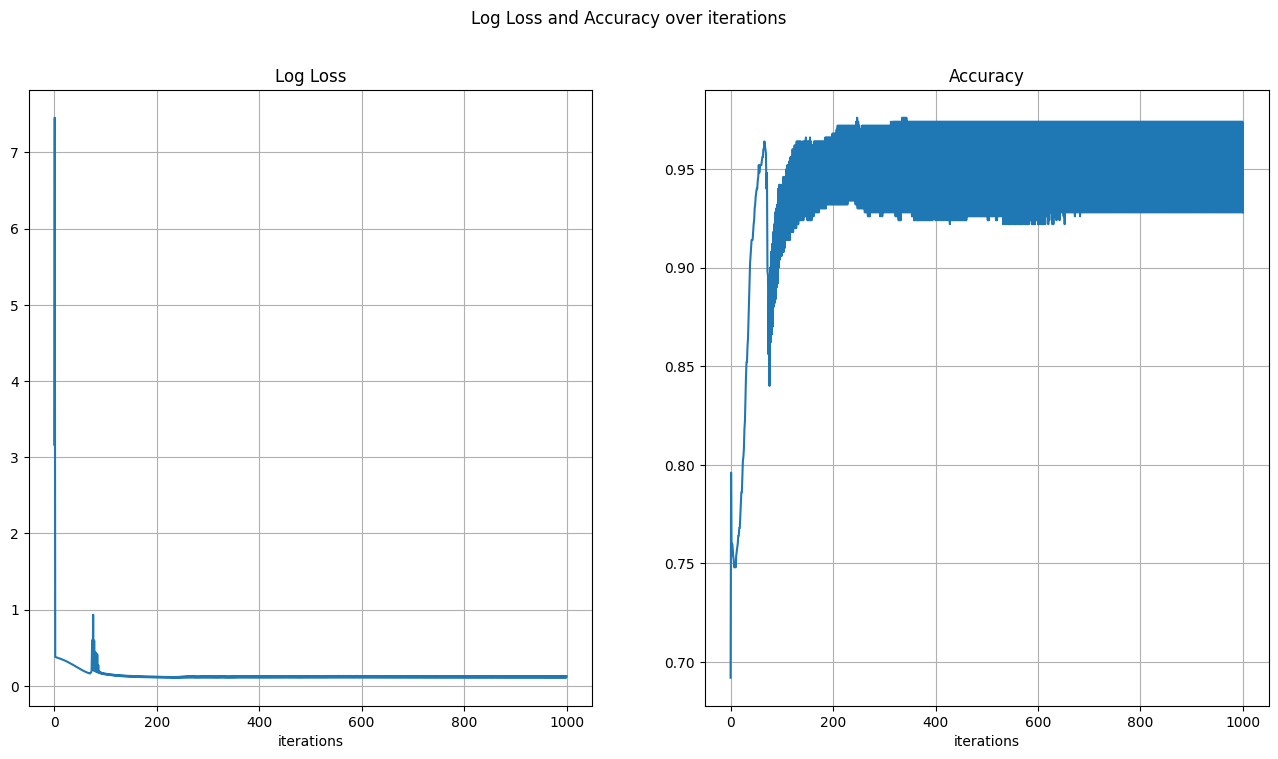

In [ ]:
#### Initialize the network parameters

input_size = x_mat_full.shape[1]
hidden_nodes = 4
output_size = 1

np.random.seed(1241)

# Initialize weight matrices
W_1 = np.random.uniform(0, 1, size=(input_size, hidden_nodes))
W_2 = np.random.uniform(0, 1, size=(hidden_nodes, output_size))

num_iter = 1001 # arbitrarily chosen
learning_rate = 0.003 # arbitrarily chosen
x_mat = x_mat_full

loss_vals, accuracies = [], []

for i in range(num_iter):
    ### Do a forward computation, and get the gradient
    y_pred, gradient = forward_pass(W_1, W_2)

    ## Update the weight matrices
    W_1 -= learning_rate * gradient[0]
    W_2 -= learning_rate * gradient[1]

    ### Compute the loss and accuracy
    loss = loss_fn(y, y_pred)
    loss_vals.append(loss)

    accuracy = np.mean((y_pred >= 0.5) == y)
    accuracies.append(accuracy)

    ## Print the loss and accuracy for every 200th iteration
    if (i >= 200 and i % 200 == 0):
      print(f"Iteration {i}: Loss = {loss:.4f}, Accuracy = {accuracy:.4f}")


plot_loss_accuracy(loss_vals, accuracies)

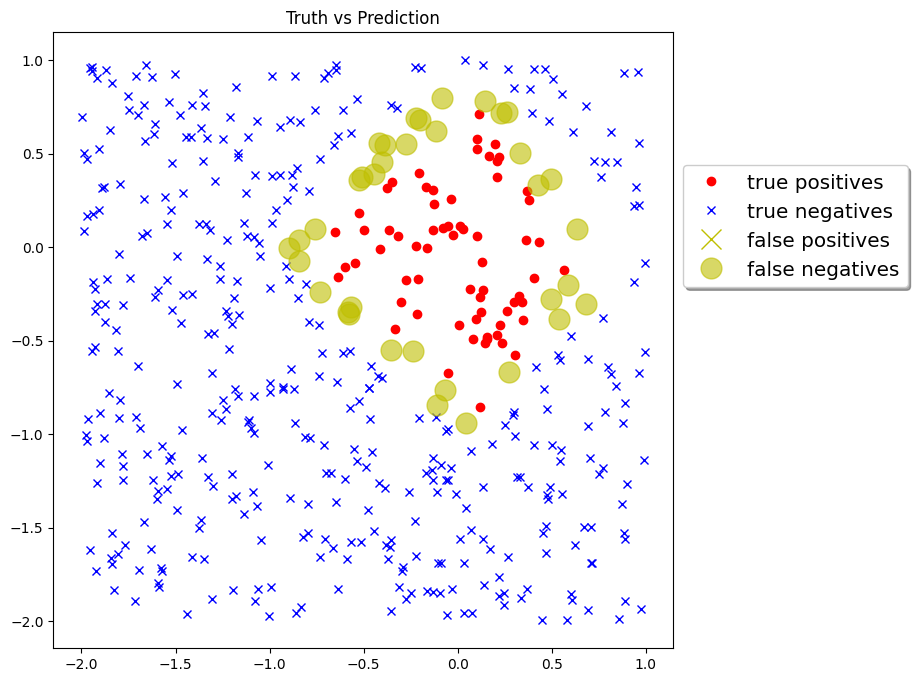

In [ ]:
pred1 = (y_pred>=.5)
pred0 = (y_pred<.5)

fig, ax = plt.subplots(figsize=(8, 8))
# true predictions
ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1], 'ro', label='true positives')
ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1], 'bx', label='true negatives')
# false predictions
ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1], 'yx', label='false positives', markersize=15)
ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1], 'yo', label='false negatives', markersize=15, alpha=.6)
ax.set(title='Truth vs Prediction')
ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='x-large');

**Remarks**: For the supplementary activity, I have changed the input values as well as the weight matrices by adjusting the ranges of their values. In the results, as we can see, even if the same learning rate was used for the model, the accuracy and loss values were not the same as in our initial testing.

One change that occured in the visualization is that the diamond is now placed at the upper right corner as compared to the earlier one which is in the middle.

The accuracy was down to 92.80%, however, the loss value decreased to 12.55%. It is important to take note that changing the input and the weight matrices also changed the ideal value for the learning rate. I found out that the ideal learning rate that gave the highest accuracy and lowest loss values is now 0.002 as shown below:

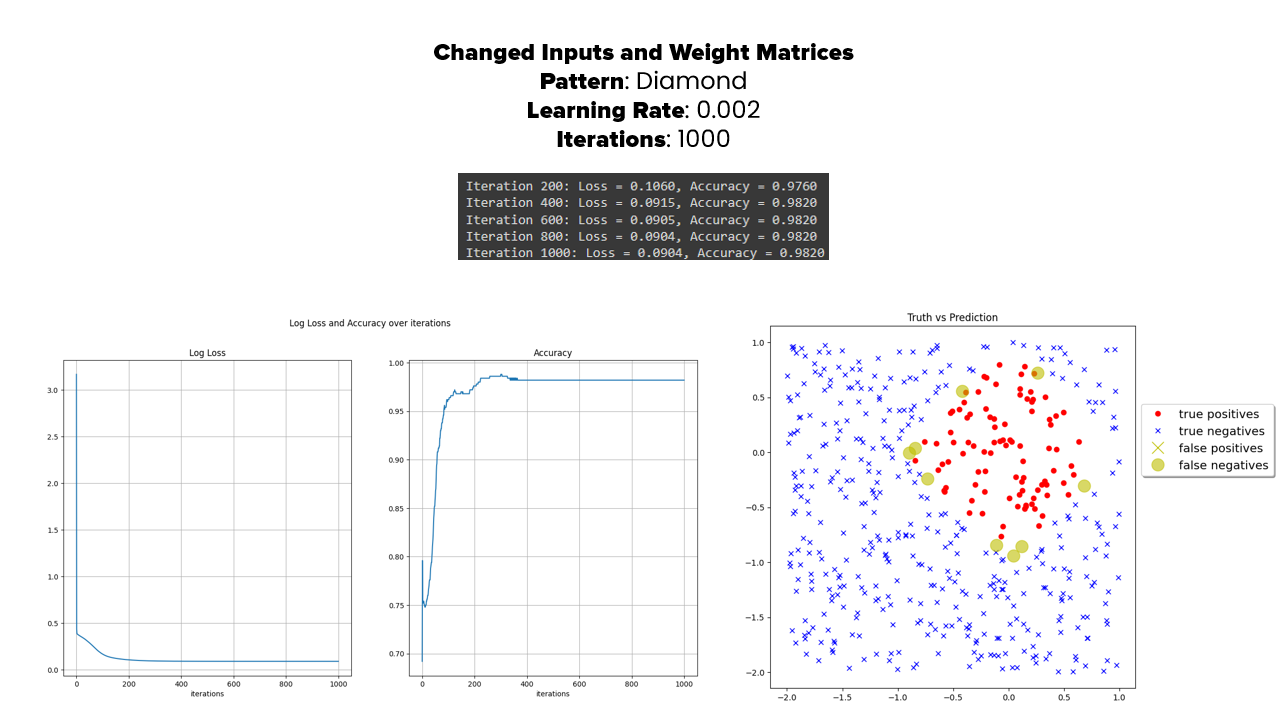

#### Conclusion

This activity allowed me to explore how to build a neural network manually. I have gained valuable insights regarding the creation of neural networks including:

* Activation functions are useful in helping our models to understand complex data by introducing non-linearity.

* Weight matrices play an important role in determining the performance of the matrix. One key factor that is being considered in creating the weight matrices are the proper dimensions to be used. In this activity, I have found out that the weight matrices' sizes or shapes are dependent on the number of nodes of the current and next layer of the architecture of the neural network. The number of rows is determined by the number of nodes in the current layer while the number of columns is determined by the number of nodes in the next layer.

* When training a model, one key parameter that can be tweaked is the learning rate. Doing this activity taught me that the learning rate values can drastically change the accuracy of the model. The learning rate value can be based on the number of iterations that are done by the model. A higher learning rate typically requires higher number of iterations so the model could learn properly.